In [2]:
pwd

'/content'

In [3]:
mkdir data

In [4]:
cd data

/content/data


必要なライブラリのインポートとCSVデータの取り込みを行う

In [5]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline
df = pd.read_csv('mushrooms.csv')
df.head(10) # 先頭10行の確認

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
5,edible,convex,scaly,yellow,yes,almond,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,black,numerous,grasses
6,edible,bell,smooth,white,yes,almond,free,close,broad,gray,...,smooth,white,white,partial,white,one,pendant,black,numerous,meadows
7,edible,bell,scaly,white,yes,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,scattered,meadows
8,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,pink,...,smooth,white,white,partial,white,one,pendant,black,several,grasses
9,edible,bell,smooth,yellow,yes,almond,free,close,broad,gray,...,smooth,white,white,partial,white,one,pendant,black,scattered,meadows


正解データの集計を行い、不均衡になっていないか確認する

In [6]:
df['class'].value_counts()

edible       4208
poisonous    3916
Name: class, dtype: int64

どうやら不均等ではないようだ

欠損値がないか確認する

In [7]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

欠損値はなかった

In [8]:
df.shape

(8124, 23)

すべての列が文字列データのためダミー変数化する

In [11]:
df=pd.get_dummies(df, drop_first=True)
df

,class_poisonous,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_groovesmooth,cap-surface_scaly,cap-surface_smooth,cap-color_buff,...,population_numerous,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
8120,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
8121,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
8122,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [12]:
df.shape

(8124, 96)

特徴量と正解データに分割する

In [14]:
x=df.loc[:,'cap-shape_conical':'habitat_woods']
t=df['class_poisonous']

xとtを「訓練＆検証データ」と「テストデータ」に分割する

さらに、「訓練＆検証データ」を訓練データと検証データに分割する

In [15]:
x_train_val,x_test,y_train_val,y_test = train_test_split(x,t,
test_size = 0.2,random_state = 0)

x_train,x_val,y_train,y_val = train_test_split(x_train_val,y_train_val,
test_size = 0.2,random_state = 0)

決定木モデルを作成し、訓練データで学習する

In [16]:
model = tree.DecisionTreeClassifier(max_depth = 5,
 random_state = 0,class_weight ='balanced')

model.fit(x_train,y_train) # 学習

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=0)

検証データで正解率を求める

In [17]:
model.score(X = x_val,y = y_val)

0.9976923076923077

関数を定義し、木の深さを変化させて検証する

In [ ]:
def learn(x,t,depth=3):
    x_train,x_val,y_train,y_val = train_test_split(x,
        t,test_size = 0.2,random_state = 0)
    model = tree.DecisionTreeClassifier(max_depth =depth,random_state = 0,class_weight="balanced")
    model.fit(x_train,y_train)

    score=model.score(X=x_train,y=y_train)
    score2=model.score(X=x_val,y=y_val)
    return round(score,3),round(score2,3),model

for j in range(1,15): # jは木の深さ jには1～14が入る
    # xは特徴量、tは正解データ
    train_score,test_score,model = learn(x_train_val,y_train_val,depth = j)
    sentence="訓練データの正解率{}"
    sentence2="検証データの正解率{}"
    total_sentence='深さ{}:'+sentence+sentence2
    print(total_sentence.format(j,
    train_score,test_score))

深さ1:訓練データの正解率0.886検証データの正解率0.898
深さ2:訓練データの正解率0.953検証データの正解率0.956
深さ3:訓練データの正解率0.985検証データの正解率0.988
深さ4:訓練データの正解率0.994検証データの正解率0.995
深さ5:訓練データの正解率0.997検証データの正解率0.998
深さ6:訓練データの正解率0.997検証データの正解率0.998
深さ7:訓練データの正解率1.0検証データの正解率1.0
深さ8:訓練データの正解率1.0検証データの正解率1.0
深さ9:訓練データの正解率1.0検証データの正解率1.0
深さ10:訓練データの正解率1.0検証データの正解率1.0
深さ11:訓練データの正解率1.0検証データの正解率1.0
深さ12:訓練データの正解率1.0検証データの正解率1.0
深さ13:訓練データの正解率1.0検証データの正解率1.0
深さ14:訓練データの正解率1.0検証データの正解率1.0


深さ7で再学習しテストデータで正解率を求める

In [ ]:
model = tree.DecisionTreeClassifier(max_depth = 7,
 random_state = 0,class_weight ='balanced')

model.fit(x_train,y_train) # 学習

model.score(X = x_test,y = y_test)

1.0

正解率1.0になった

決定木を描画する

[Text(0.5789473684210527, 0.9375, 'odor_none <= 0.5\ngini = 0.5\nsamples = 5199\nvalue = [2599.5, 2599.5]'),
 Text(0.3684210526315789, 0.8125, 'stalk-root_club <= 0.5\ngini = 0.273\nsamples = 2937\nvalue = [489.648, 2510.716]'),
 Text(0.2631578947368421, 0.6875, 'stalk-root_rooted <= 0.5\ngini = 0.126\nsamples = 2593\nvalue = [180.346, 2484.907]'),
 Text(0.21052631578947367, 0.5625, 'odor_anise <= 0.5\ngini = 0.046\nsamples = 2469\nvalue = [60.115, 2484.907]'),
 Text(0.15789473684210525, 0.4375, 'spore-print-color_purple <= 0.5\ngini = 0.019\nsamples = 2432\nvalue = [24.24, 2484.907]'),
 Text(0.10526315789473684, 0.3125, 'gill-spacing_crowded <= 0.5\ngini = 0.009\nsamples = 2419\nvalue = [11.635, 2484.907]'),
 Text(0.05263157894736842, 0.1875, 'gini = -0.0\nsamples = 2345\nvalue = [0.0, 2420.901]'),
 Text(0.15789473684210525, 0.1875, 'odor_creosote <= 0.5\ngini = 0.26\nsamples = 74\nvalue = [11.635, 64.007]'),
 Text(0.10526315789473684, 0.0625, 'gini = 0.0\nsamples = 12\nvalue = [11.63

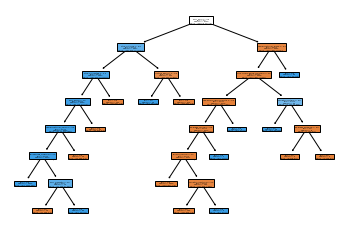

In [ ]:
from sklearn.tree import plot_tree
# plot_tree関数で決定木を描画
plot_tree(model, feature_names = x_train_val.columns,
filled = True)

ランダムフォレストも試してみる

In [18]:
# ランダムフォレストのインポート
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 200,
random_state = 0)

In [19]:
model.fit(x_train, y_train)

print(model.score(x_train, y_train)) #訓練データの正解率
print(model.score(x_val, y_val))     #検証データの正解率

1.0
1.0


テストデータで試してみる

In [20]:
print(model.score(x_test, y_test))     #テストデータの正解率

1.0


特徴量の重要度を計算する

In [21]:
importance = model.feature_importances_ # 特徴量重要度

# 列との対応がわかりやすいようにシリーズ変換
pd.Series(importance, index = x_train.columns)

cap-shape_conical    0.000109
cap-shape_convex     0.001114
cap-shape_flat       0.000789
cap-shape_knobbed    0.000513
cap-shape_sunken     0.000416
                       ...   
habitat_meadows      0.004159
habitat_paths        0.003469
habitat_urban        0.008458
habitat_waste        0.002490
habitat_woods        0.009727
Length: 95, dtype: float64

アダブーストも試してみる

In [22]:
# アダブーストのインポート
from sklearn.ensemble import AdaBoostClassifier


# ベースとなるモデル
from sklearn.tree import DecisionTreeClassifier

# 最大の深さ5の決定木を何個も作っていく
base_model = DecisionTreeClassifier(random_state = 0,
max_depth = 5)

# 決定木を500個作成
model = AdaBoostClassifier(n_estimators = 500,
random_state = 0, base_estimator = base_model)
model.fit(x_train,y_train) # 学習

print(model.score(x_train, y_train)) # 訓練データの正解率
print(model.score(x_val, y_val)) # 検証データの正解率

1.0
1.0


テストデータで試してみる

In [23]:
print(model.score(x_test, y_test)) # テストデータの正解率

1.0


正解率が1.0となった

In [28]:
x_test.shape

(1625, 95)

未知のデータで試してみる

In [29]:
new = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
model.predict(new)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1], dtype=uint8)

結果は１、つまり毒キノコとなった

このアダブーストのモデルを保存する

In [24]:
import pickle
with open('mushrooms.pkl',"wb") as f:
    pickle.dump(model,f)